Plots win rate of victim X vs. an adversary trained on victim Y.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from typing import Tuple

import utils

plt.style.use(
    ["tableau-colorblind10", utils.get_style("default"), utils.get_style("2-col")]
)

### Adversary trained on cp505

In [2]:
df = utils.parse_sgfs(
    ["/nas/ucb/k8/go-attack/match/ttseng-transfer-ckpts-20221224-004846"]
)
df["victim_net"] = df.victim_name.str.slice(stop=len("cp505"))

print(len(df))
print(df.victim_name.unique())
print(df.victim_visits.unique())
print(df.adv_name.unique())

4200
['cp127-v1' 'cp505-v4' 'cp127-v16' 'cp127-v64' 'cp127-v8' 'cp505-v2'
 'cp505-v32' 'cp127-v4' 'cp505-v8' 'cp127-v32' 'cp505-v64' 'cp505-v16'
 'cp127-v2' 'cp505-v1']
[ 1  4 16 64  8  2 32]
['adv-cp505only-s13367040-v600' 'adv-cp127only-s17550336-v600']


Win rate vs. cp127:
 victim_visits
1     0.594595
2     0.693333
4     0.000000
8     0.000000
16    0.006667
32    0.000000
64    0.000000
Name: adv_win, dtype: float64
Win rate vs. cp505:
 victim_visits
1     1.000000
2     1.000000
4     0.558442
8     0.222973
16    0.019737
32    0.000000
64    0.000000
Name: adv_win, dtype: float64
Win rate vs. cp127:
 victim_visits
1     1.0
2     1.0
4     0.0
8     0.0
16    0.0
32    0.0
64    0.0
Name: adv_win, dtype: float64
Win rate vs. cp505:
 victim_visits
1     0.0
2     0.0
4     0.0
8     0.0
16    0.0
32    0.0
64    0.0
Name: adv_win, dtype: float64


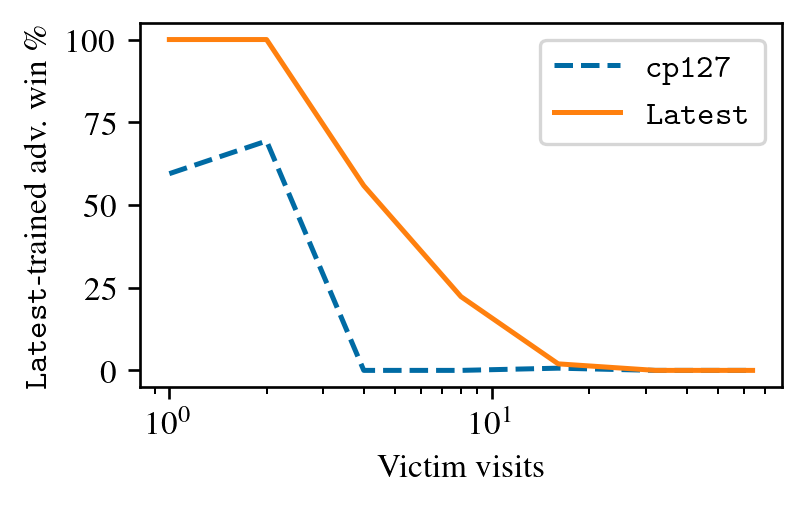

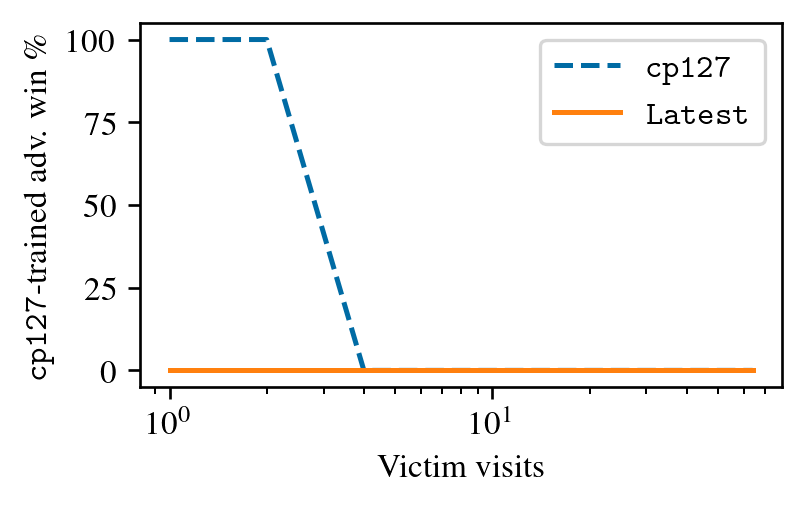

In [3]:
def plot(
    df: pd.DataFrame, adversary_name: str, adversary_label: str
) -> Tuple[matplotlib.figure.Figure, matplotlib.axes.Axes]:
    """Plots adversary win rate vs. cp127 and cp505.

    Args:
        df: Dataframe of games.
        adversary_name: The name of the adversary.
        adversary_label: What to label the adversary on the plot.
    """
    victim_net_to_plot_kwargs = {
        "cp127": {
            "label": "$\\texttt{cp127}$",
            "linestyle": "--",
        },
        "cp505": {
            "label": "$\\texttt{Latest}$",
        },
    }
    df = df.query(f"adv_name == '{adversary_name}'")

    fig, ax = plt.subplots(1, 1)
    for victim_net in sorted(df.victim_net.unique()):
        win_rate = (
            df.query(f"victim_net == '{victim_net}'")
            .groupby("victim_visits")
            .adv_win.mean(numeric_only=True)
        )
        print(f"Win rate vs. {victim_net}:\n", win_rate)
        (100 * win_rate).plot(**victim_net_to_plot_kwargs[victim_net])
    plt.ylim(-5, 105)
    plt.xscale("log")
    plt.ylabel(f"{adversary_label} win \\%")
    plt.xlabel("Victim visits")
    plt.legend()
    return fig, ax


fig, _ = plot(df, "adv-cp505only-s13367040-v600", "$\\texttt{Latest}$-trained adv.")
fig.savefig("adv505-transfer.pgf", backend="pgf")
fig, _ = plot(df, "adv-cp127only-s17550336-v600", "$\\texttt{cp127}$-trained adv.")
fig.savefig("adv127-transfer.pgf", backend="pgf")